# Today, we will explore three new tools
1. Multi-class classification
2. Basic convolutional neural network
3. Google Colaboratory

## Fashion MNIST data will be used

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load data and extract input and label

In [3]:
data_raw = pd.read_csv('L11.2_mnist_fashion.csv', header = 0, index_col = False)
data_raw.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


### Keep only the first 1,000 data points to speed things up

In [19]:
data = data_raw.iloc[:1000, 1:] ## input = 2nd column onward
data = data / 255.0 ## convert [0, 255] to [0, 1]
label = data_raw['label'].iloc[:1000] ## label = 1st column

print('data dimension:', data.shape)

label.head()

data dimension: (1000, 784)


0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

## First, let's look at how classical ML models handle multiple classes

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

## Split data into 80-20 train-test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, stratify = label, \
                                                    shuffle = True, random_state = 3011979)

## Use default models to fit the training data

In [22]:
lr_model = LogisticRegression(max_iter = 10000, random_state = 3011979)
rf_model = RandomForestClassifier(random_state = 3011979)
mlp_model = MLPClassifier(max_iter = 10000, random_state = 3011979)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=10000, random_state=3011979)

## Let's look at the outputs
### First, the class labels seen by the model

In [27]:
print('Logistic Regression class labels:', lr_model.classes_)
print('Random Forest class labels:', rf_model.classes_)
print('MLP class labels:', mlp_model.classes_)

Logistic Regression class labels: [0 1 2 3 4 5 6 7 8 9]
Random Forest class labels: [0 1 2 3 4 5 6 7 8 9]
MLP class labels: [0 1 2 3 4 5 6 7 8 9]


### Next, the prediction outputs

In [33]:
lr_predict = lr_model.predict_proba(X_test)
print('input test data dimension:', X_test.shape)
print('prediction output dimension:', lr_predict.shape)
print('predictions:\n', lr_predict)
print('sums along class axis:\n', lr_predict.sum(axis = 1))

input test data dimension: (200, 784)
prediction output dimension: (200, 10)
predictions:
 [[3.15901956e-02 1.19909349e-02 3.20200663e-01 ... 1.74958302e-02
  2.05857877e-02 4.99499367e-03]
 [9.93115733e-03 1.35818114e-03 6.87123786e-01 ... 1.44330281e-03
  4.14161185e-03 8.86683547e-04]
 [7.70752489e-05 1.77878685e-05 9.73211509e-01 ... 5.90884378e-08
  8.80494637e-03 2.10908721e-03]
 ...
 [1.20222309e-03 1.03651906e-04 9.86887714e-01 ... 6.66103910e-09
  4.95084733e-04 8.01956738e-05]
 [8.30846820e-05 2.21989572e-04 5.09720985e-01 ... 4.10189637e-07
  2.63845254e-04 4.58964164e-05]
 [1.66409080e-07 2.14189289e-05 2.18711262e-05 ... 9.97829383e-01
  4.50281438e-04 2.94399960e-05]]
sums along class axis:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [34]:
rf_predict = rf_model.predict_proba(X_test)
print('input test data dimension:', X_test.shape)
print('prediction output dimension:', rf_predict.shape)
print('predictions:\n', rf_predict)
print('sums along class axis:\n', rf_predict.sum(axis = 1))

input test data dimension: (200, 784)
prediction output dimension: (200, 10)
predictions:
 [[0.01 0.01 0.51 ... 0.   0.04 0.  ]
 [0.11 0.04 0.22 ... 0.01 0.07 0.  ]
 [0.05 0.   0.53 ... 0.   0.05 0.01]
 ...
 [0.01 0.01 0.74 ... 0.   0.   0.  ]
 [0.01 0.   0.4  ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.91 0.   0.01]]
sums along class axis:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [35]:
mlp_predict = mlp_model.predict_proba(X_test)
print('input test data dimension:', X_test.shape)
print('prediction output dimension:', mlp_predict.shape)
print('predictions:\n', mlp_predict)
print('sums along class axis:\n', mlp_predict.sum(axis = 1))

input test data dimension: (200, 784)
prediction output dimension: (200, 10)
predictions:
 [[1.92229832e-03 9.55594494e-04 2.12665513e-01 ... 5.73223661e-04
  2.22646732e-03 1.53398724e-04]
 [5.33823698e-04 5.03099417e-05 6.34444357e-01 ... 5.63300615e-05
  9.10632346e-04 1.68721546e-06]
 [1.53312150e-09 1.04784663e-11 9.99645095e-01 ... 2.86858903e-11
  2.66724963e-04 9.42380045e-09]
 ...
 [6.96188433e-07 1.97544690e-12 9.99994990e-01 ... 2.01401060e-14
  2.66637271e-08 3.56749322e-14]
 [8.83874978e-08 1.04157390e-08 8.66301511e-01 ... 3.35192282e-09
  1.08032807e-06 4.52225424e-10]
 [8.61812708e-14 6.71531831e-10 2.11595149e-09 ... 9.99994885e-01
  5.97613081e-08 7.73507353e-10]]
sums along class axis:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

### Confusion matrix
* Output dimension is N x L where N = number of samples and L = number of class labels
* We use **np.argmax(, axis = 1)** to find the predicted class label as the class with highest probability

In [50]:
print('Logistic Regression confusion matrix:\n', confusion_matrix(y_test, np.argmax(lr_predict, axis = 1)))
print('Random Forest confusion matrix:\n', confusion_matrix(y_test, np.argmax(rf_predict, axis = 1)))
print('MLP confusion matrix:\n', confusion_matrix(y_test, np.argmax(mlp_predict, axis = 1)))

Logistic Regression confusion matrix:
 [[17  0  0  2  0  0  3  0  0  0]
 [ 0 16  0  0  1  0  1  0  0  0]
 [ 1  0 12  2  3  0  2  0  0  0]
 [ 0  0  0 17  3  0  2  0  0  0]
 [ 0  0  5  1 15  0  2  0  0  0]
 [ 1  0  0  0  0  9  0  7  0  0]
 [ 1  0  4  1  4  0 11  0  0  0]
 [ 0  0  0  0  0  1  0 17  0  2]
 [ 0  0  0  0  1  0  0  0 18  0]
 [ 0  0  1  0  0  1  0  1  0 15]]
Random Forest confusion matrix:
 [[19  0  0  0  0  0  3  0  0  0]
 [ 0 16  1  1  0  0  0  0  0  0]
 [ 1  0 16  1  2  0  0  0  0  0]
 [ 0  0  0 20  1  0  1  0  0  0]
 [ 0  0  6  2 14  1  0  0  0  0]
 [ 0  0  0  0  0 13  0  4  0  0]
 [ 2  0  4  3  2  0 10  0  0  0]
 [ 0  0  0  0  0  1  0 17  0  2]
 [ 0  0  1  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  1  3  0 14]]
MLP confusion matrix:
 [[19  0  0  0  0  0  3  0  0  0]
 [ 0 16  0  0  1  0  1  0  0  0]
 [ 0  1 13  1  3  0  2  0  0  0]
 [ 0  0  0 17  3  0  2  0  0  0]
 [ 0  0  3  1 16  0  3  0  0  0]
 [ 1  0  0  0  0  9  0  7  0  0]
 [ 1  0  3  0  6  0 11  0  0  0]
 [ 0  0  0  

## To monitor performance across mutliple classes, we can use a scikit-learn built-in report
Import **classification_report()** from **sklearn.metrics**

**classification_report()** takes 3 key inputs:
1. True label
2. Predicted label
3. Name for each label

### Define name for each class in [Fashion MNIST](https://www.bualabs.com/archives/3398/what-is-fashion-mnist-dataset/)

In [54]:
class_name = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', \
              7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(lr_predict, axis = 1), \
                            target_names = [class_name[x] for x in lr_model.classes_]))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.77      0.81        22
     Trouser       1.00      0.89      0.94        18
    Pullover       0.55      0.60      0.57        20
       Dress       0.74      0.77      0.76        22
        Coat       0.56      0.65      0.60        23
      Sandal       0.82      0.53      0.64        17
       Shirt       0.52      0.52      0.52        21
     Sneaker       0.68      0.85      0.76        20
         Bag       1.00      0.95      0.97        19
  Ankle boot       0.88      0.83      0.86        18

    accuracy                           0.73       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.75      0.73      0.74       200



## Model coefficients (for Logistic Regression and MLP)
* Logistic Regression generates **one coefficient set per label**
* MLP **outputs multiple classes** within a single model
  * Output layer size = number of class labels
  * The connection from hidden layer (size = 100) to output layer (size = number of class labels) acts like multiple Logistic Regression

In [45]:
print('Logistic Regression coefficient counts:', lr_model.coef_.shape)
print('MLP coefficient counts:')

for i in range(len(mlp_model.coefs_)):
    print('  Layer ' + str(i) + ':', mlp_model.coefs_[i].shape)

Logisit Regression coefficient counts: (10, 784)
MLP coefficient counts:
  Layer 0: (784, 100)
  Layer 1: (100, 10)


### To normalize output from all neuron in the output layers to sum to 1, we use [Softmax activation](https://en.wikipedia.org/wiki/Softmax_function) which converts $\left(y_1, y_2, \dots, y_m\right)$ to $\left(\frac{e^{y_1}}{K}, \frac{e^{y_2}}{K}, \dots, \frac{e^{y_m}}{K}\right)$, where $K = \sum_{i=1}^m e^{y_i}$
Basically, we train the neural network model to predict values that are similar to log probabilities

## So far, we achieve ok performance on by considering each pixel as a separated input
But some classes still have 50-60% precision and recall. **Can we do better with CNN on input image?**

## Let's use TensorFlow/Keras to implement AlexNet

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf

## Original AlexNet consists of the following layers
**First convolutional block**
1. **Conv2D** with 96 filters of size 11x11, stride of 4x4, and valid padding
2. **Activation** with ReLu

**Second convolutional block**

3. **Conv2D** with 256 filters of size 5x5, stride of 1x1, and valid padding
4. **Activation** with ReLu
5. **MaxPool2D** with pool size of 3x3 and stride of 2x2

**Third convolutional block**

6. **Conv2D** with 384 filters of size 3x3, stride of 1x1, and valid padding
7. **Activation** with ReLu
8. **MaxPool2D** with pool size of 3x3 and stride of 2x2

**Fourth convolutional block**

9. **Conv2D** with 384 filters of size 3x3, stride of 1x1, and same padding
10. **Activation** with ReLu

**Fifth convolutional block**

11. **Conv2D** with 256 filters of size 3x3, stride of 1x1, and same padding
12. **Activation** with ReLu
13. **MaxPool2D** with pool size of 3x3 and stride of 2x2

**Feed into fully connected layers**

14. **Flatten**
15. **Dense** with 4096 hidden neurons
16. **Dense** with 4096 hidden neurons
17. **Dense** with 1000 output neurons

## Let's put together the model
### Note that the original AlexNet was designed for input dimension of 224x224 while our images are 28x28
### We will make some adjustments to reduce the model accordingly

In [122]:
def gen_alexnet():
    model = Sequential()
    model.add(InputLayer(input_shape = [28, 28, 1]))

    model.add(Conv2D(filters = 64, kernel_size = [5, 5], padding = 'valid', strides = [2, 2]))
    model.add(Activation(activation = 'relu'))

    model.add(Conv2D(filters = 128, kernel_size = [3, 3], padding = 'valid', strides = [1, 1]))
    model.add(Activation(activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3, 3], strides = [2, 2]))
    
    model.add(Conv2D(filters = 256, kernel_size = [3, 3], padding = 'same', strides = [1, 1]))
    model.add(Activation(activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3, 3], strides = [2, 2]))

    model.add(Flatten())

    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dense(units = 10, activation = 'softmax')) ## use Softmax activation for output 10 classes

    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), \
                        metrics = ['accuracy'])
    
    return model

In [123]:
our_alexnet = gen_alexnet()
our_alexnet.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 12, 12, 64)        1664      
_________________________________________________________________
activation_31 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
activation_32 (Activation)   (None, 10, 10, 128)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
activation_33 (Activation)   (None, 4, 4, 256)       

## Use the full dataset here

In [72]:
data = data_raw.iloc[:, 1:] ## input = 2nd column onward
data = data / 255.0 ## convert [0, 255] to [0, 1]
label = data_raw['label'] ## label = 1st column

print('data dimension:', data.shape)
label.head()

data dimension: (60000, 784)


0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

## We need to preprocess input and label data dimension for TensorFlow/Keras
### For input, the data dimension will be converted from 60,000 x 784 to 60,000 x 28 x 28 x 1
Convolutional layer expect 3D input for 2D image with an extra dimension for **channel**

In [97]:
reshaped_data = []

for i in range(data.shape[0]):
    reshaped_data.append(np.reshape(data.iloc[i, :].to_numpy(), (28, 28, 1)))

reshaped_data = np.array(reshaped_data)
print('shape of new input data:', reshaped_data.shape)

shape of new input data: (60000, 28, 28, 1)


### For label, the model expect a one-hot encoding style

In [98]:
reshaped_label = pd.get_dummies(label).to_numpy()
print('shape of new label data:', reshaped_label.shape)

shape of new label data: (60000, 10)


## Split data into 60-20-20 train-validation-test sets

In [101]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_data, reshaped_label, test_size = 0.2, stratify = label, \
                                                    shuffle = True, random_state = 3011979)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, \
                                                  shuffle = True, random_state = 3011979)

In [106]:
print(X_val.shape)
print(y_val.shape)

(9600, 28, 28, 1)
(9600, 10)


## Let's do a simple training with only ModelCheckpoint

In [128]:
our_alexnet = tf.keras.models.load_model('./fashion_mnist_l11/model.ckpt')

In [127]:
# tf.random.set_seed(3011979)
# history = our_alexnet.fit(X_train, y_train, batch_size = 128, epochs = 100, \
#                           validation_data = (X_val, y_val), verbose = 1, \
#                           callbacks = [ModelCheckpoint('./fashion_mnist_l11/model.ckpt', verbose = 0)])

Epoch 1/100
300/300 [==============================] - 18s 58ms/step - loss: 0.3339 - accuracy: 0.8782 - val_loss: 0.3514 - val_accuracy: 0.8732
INFO:tensorflow:Assets written to: ./fashion_mnist_l11\model.ckpt\assets
Epoch 2/100
300/300 [==============================] - 18s 60ms/step - loss: 0.3233 - accuracy: 0.8821 - val_loss: 0.3529 - val_accuracy: 0.8698
INFO:tensorflow:Assets written to: ./fashion_mnist_l11\model.ckpt\assets
Epoch 3/100
300/300 [==============================] - 18s 61ms/step - loss: 0.3135 - accuracy: 0.8856 - val_loss: 0.3349 - val_accuracy: 0.8805
INFO:tensorflow:Assets written to: ./fashion_mnist_l11\model.ckpt\assets
Epoch 4/100
300/300 [==============================] - 17s 58ms/step - loss: 0.3040 - accuracy: 0.8892 - val_loss: 0.3431 - val_accuracy: 0.8724
INFO:tensorflow:Assets written to: ./fashion_mnist_l11\model.ckpt\assets
Epoch 5/100
300/300 [==============================] - 18s 59ms/step - loss: 0.2945 - accuracy: 0.8915 - val_loss: 0.3256 - val_

KeyboardInterrupt: 

### View loss curves

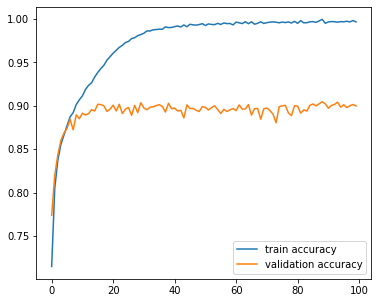

In [119]:
plt.figure(figsize = (6, 5))
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

### Classification report

In [132]:
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(our_alexnet.predict(X_test), axis = 1), \
                            target_names = [class_name[x] for x in lr_model.classes_]))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1200
     Trouser       0.99      0.98      0.99      1200
    Pullover       0.81      0.86      0.84      1200
       Dress       0.94      0.82      0.88      1200
        Coat       0.84      0.82      0.83      1200
      Sandal       0.97      0.98      0.97      1200
       Shirt       0.70      0.74      0.72      1200
     Sneaker       0.96      0.95      0.95      1200
         Bag       0.98      0.97      0.97      1200
  Ankle boot       0.96      0.96      0.96      1200

    accuracy                           0.89     12000
   macro avg       0.90      0.89      0.89     12000
weighted avg       0.90      0.89      0.89     12000



### It is clear that our basic PC cannot handle larger neural network and dataset
# Time to use free online resources from Google Colaboratory